#**STEP 1 : PERKENALAN**

**GRADED CHALLENGE 4**

**BY : MUHAMMAD RIZKI HERFIAN**

**BATCH : 004**

**MATERI : Clustering**

**Graded Challenge 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:**

* Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
* Mampu mempersiapkan data untuk digunakan dalam Clustering
* Mampu mengimplementasikan Clustering pada data yang diberikan


## **STEP 2 : IMPORTING LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering as AC
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.preprocessing import StandardScaler

**Library yang akan digunakan, masing-masing memiliki fungsi sebagai berikut:**

* Pandas adalah sebuah library yang menyediakan struktur data dan analisis data yang mudah digunakan. Pandas biasa digunakan untuk membuat tabel, mengubah dimensi data, mengecek data, dan lain sebagainya.

* Numpy berfungsi memudahkan operasi komputasi tipe data numerik seperti penjumlahan, pengurangan, perkalian, pangkat, dan operasi lainnya yang bisa diterapkan pada vektor atau matriks.

* Matplotlib adalah modul python untuk menggambar plot 2D dengan kualitas tinggi. matplotlib dapat digunakan dalam script python, interpreter python dan ipython, server, dan 6 GUI toolkit.

* Seaborn bertujuan agar visualisasi menjadi bagian penting dari proses eksplorasi dan pemahaman data.

* Scikit-learn atau sklearn adalah modul untuk bahasa pemograman python yang dibangun diatas NumPy, SciPy, dan matplotlib, fungsinya dapat membantu melakukan processing data ataupun melakukan training data untuk kebutuhan machine-learning.

## **STEP 3 : DATA LOADING**

**Formating**

In [2]:
#Memudahkan untuk bisa melihat semua kolom
pd.set_option('display.max_columns', 100)

#Set nilai random agar nilainya konstan
np.random.seed(77)

**Proses Read dataset**

In [3]:
data = pd.read_csv('CC GENERAL.csv')

## **STEP 4 : DATA EXPLORATION**

**Data memiliki jumlah baris 8950 dan jumlah kolom 18**

In [4]:
data.shape

(8950, 18)

**Melihat isi 10 data pertama**

In [5]:
data.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


**Melihat 10 data Middle**

In [6]:
data[4000:4010]

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
4000,C14113,4705.036885,1.0,887.87,810.70,77.17,766.181321,0.583333,0.500000,0.166667,0.166667,2,15,6000.0,1091.779354,1107.649182,0.000000,12
4001,C14114,4802.507595,1.0,0.00,0.00,0.00,286.576749,0.000000,0.000000,0.000000,0.083333,1,0,5000.0,986.609534,1852.577516,0.000000,12
4002,C14115,1724.945864,1.0,2075.18,1841.70,233.48,0.000000,0.916667,0.916667,0.416667,0.000000,0,25,8500.0,3792.747568,451.651522,0.000000,12
4003,C14116,3421.570645,1.0,0.00,0.00,0.00,287.279970,0.000000,0.000000,0.000000,0.083333,1,0,8500.0,1387.841466,801.652585,0.000000,12
4004,C14117,99.029726,1.0,1496.87,429.27,1067.60,0.000000,0.916667,0.333333,0.833333,0.000000,0,48,5000.0,1760.086698,164.907900,0.416667,12
4005,C14119,4353.465530,1.0,0.00,0.00,0.00,301.200047,0.000000,0.000000,0.000000,0.250000,3,0,4650.0,984.373050,2432.513704,0.000000,12
4006,C14120,4506.159773,1.0,1948.25,546.35,1401.90,1870.142289,1.000000,0.250000,1.000000,0.083333,2,27,11500.0,2398.862474,1166.102556,0.000000,12
4007,C14121,231.089583,1.0,1547.92,1547.92,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,9000.0,1230.772375,196.595495,0.333333,12
4008,C14122,5199.213536,1.0,271.40,204.00,67.40,1013.616077,0.583333,0.166667,0.333333,0.333333,7,7,10000.0,1328.030861,1215.223154,0.000000,12
4009,C14123,460.644885,1.0,805.42,805.42,0.00,1916.483068,0.500000,0.500000,0.000000,0.166667,4,6,7000.0,708.479385,190.005996,0.285714,12


**Melihat isi 10 data terakhir**

In [7]:
data.tail(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8940,C19181,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6
8941,C19182,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6
8942,C19183,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6
8943,C19184,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6
8944,C19185,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,NaN,0.00,6
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


**Melihat semua nama kolom yang terdapat pada dataset**

In [8]:
data.columns.values

array(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'], dtype=object)

**Tentang dataset ini :**

**Source :** https://www.kaggle.com/arjunbhasin2013/ccdata

**Data Set Information :**

This case requires to develop a customer segmentation to define marketing strategy. The
sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

**Following is the Data Dictionary for Credit Card dataset :**
* CUSTID : Identification of Credit Card holder (Categorical)
* BALANCE : Balance amount left in their account to make purchases (
* BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
* PURCHASES : Amount of purchases made from account
* ONEOFFPURCHASES : Maximum purchase amount done in one-go
* INSTALLMENTSPURCHASES : Amount of purchase done in installment
* CASHADVANCE : Cash in advance given by the user
* PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
* ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
* PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
* CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
* CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
* PURCHASESTRX : Numbe of purchase transactions made
* CREDITLIMIT : Limit of Credit Card for user
* PAYMENTS : Amount of Payment done by user
* MINIMUM_PAYMENTS : Minimum amount of payments made by user
* PRCFULLPAYMENT : Percent of full payment paid by user
* TENURE : Tenure of credit card service for user

**Melihat value pada kolom target**

In [9]:
data["TENURE"].value_counts()

12    7584
11     365
10     236
6      204
8      196
7      190
9      175
Name: TENURE, dtype: int64

**Melihat info data dan mengambil informasi tipe data dari tiap kolom**

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

**Melihat nilai keseluruhan data dari masing-masing kolom**

In [11]:
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


**Melihat nilai data yang kolomnya bertipe data object**

In [12]:
data.select_dtypes("object").describe().T

,count,unique,top,freq
CUST_ID,8950,8950,C12706,1


**Melihat nilai data yang kolomnya bertipe data number**

In [13]:
data.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


## **STEP 5 : DATA CLEANING**

**Membuat variabel baru dan mengcopy dataset yang sudah di load sebelumnya, fungsi dari mengcopy data sebelum diolah adalah untuk menjaga values asli dari dataset tersebut.**

In [14]:
dtc =  data.copy()

**Melihat jumlah data yang missing values pada semua kolom**

In [15]:
dtc.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

**Menghitung total data yang hilang pada kolom CREDIT_LIMIT, nilai presentase data yang hilang adalah 0,01%**

In [16]:
dtc['CREDIT_LIMIT'].isnull().sum() * 100 / len(data)

0.0111731843575419

**Menghitung total data yang hilang pada kolom MINIMUM_PAYMENTS, nilai presentase data yang hilang adalah 3,49%**

In [17]:
dtc['MINIMUM_PAYMENTS'].isnull().sum() * 100 / len(data)

3.4972067039106145

**Mengisi data yang missing values pada kedua kolom tersebut menggunakan nilai rata-rata dari kedua dataset.**

In [18]:
dtc['CREDIT_LIMIT'].fillna(dtc['CREDIT_LIMIT'].mean(), inplace=True)
dtc['MINIMUM_PAYMENTS'].fillna(dtc['MINIMUM_PAYMENTS'].mean(), inplace=True)

**Melihat apakah ada data yang duplicate**

In [19]:
dtc.duplicated().any()

False

In [20]:
dtc.duplicated().sum()

0

##**STEP 6 : EXPLORATORY DATA ANALYSIS (EDA)**

In [21]:
# set plot style for EDA
plt.style.use('fivethirtyeight')

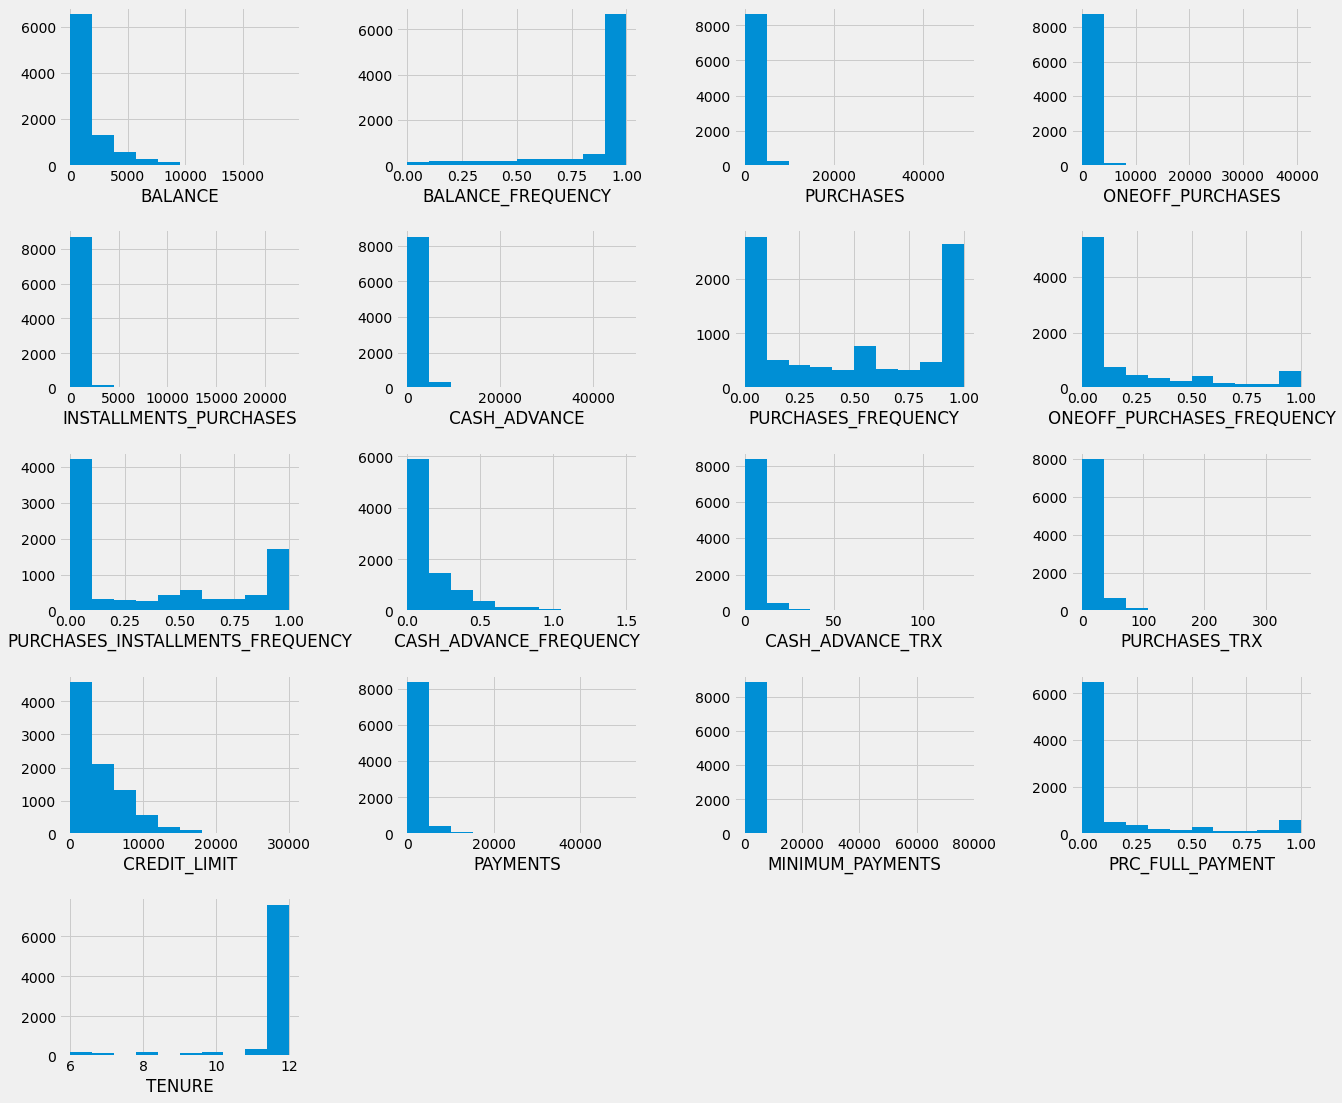

In [22]:
fig = plt.figure(figsize=(20, 18))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, len(dtc.columns)):
    ax = fig.add_subplot(5, 4, i)
    ax.hist(dtc[dtc.columns[i]])
    #sns.histplot(rawdf[rawdf.columns[i]])
    plt.xlabel(dtc.columns[i])

**Dari hasil plot dataset diatas, terdapat banyak distribusi data yang skewed dan rata-rata skewed ke kanan.**

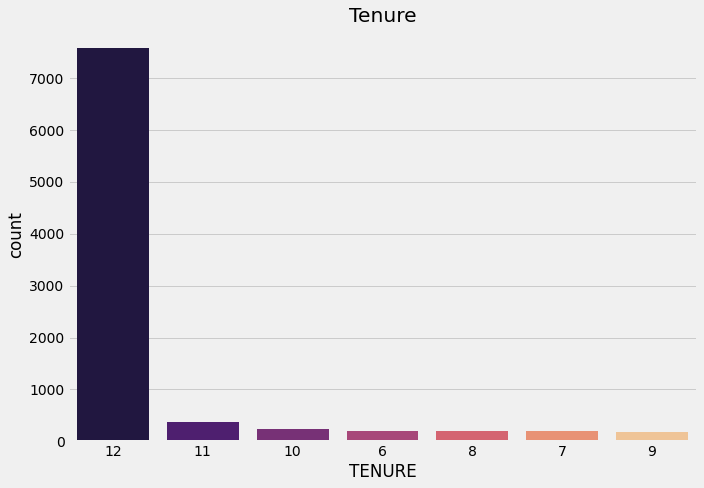

In [23]:
plt.figure(figsize = (10, 7))
sns.countplot(
    x = dtc["TENURE"],
    order = dtc["TENURE"].value_counts().sort_values(ascending = False).index,
    palette = "magma"
)
plt.title("Tenure", fontweight = 20)

plt.tight_layout()
plt.show()

**Rata-rata nasabah memilih jangka waktu Tenure kredit yang paling panjang yakni 12.**

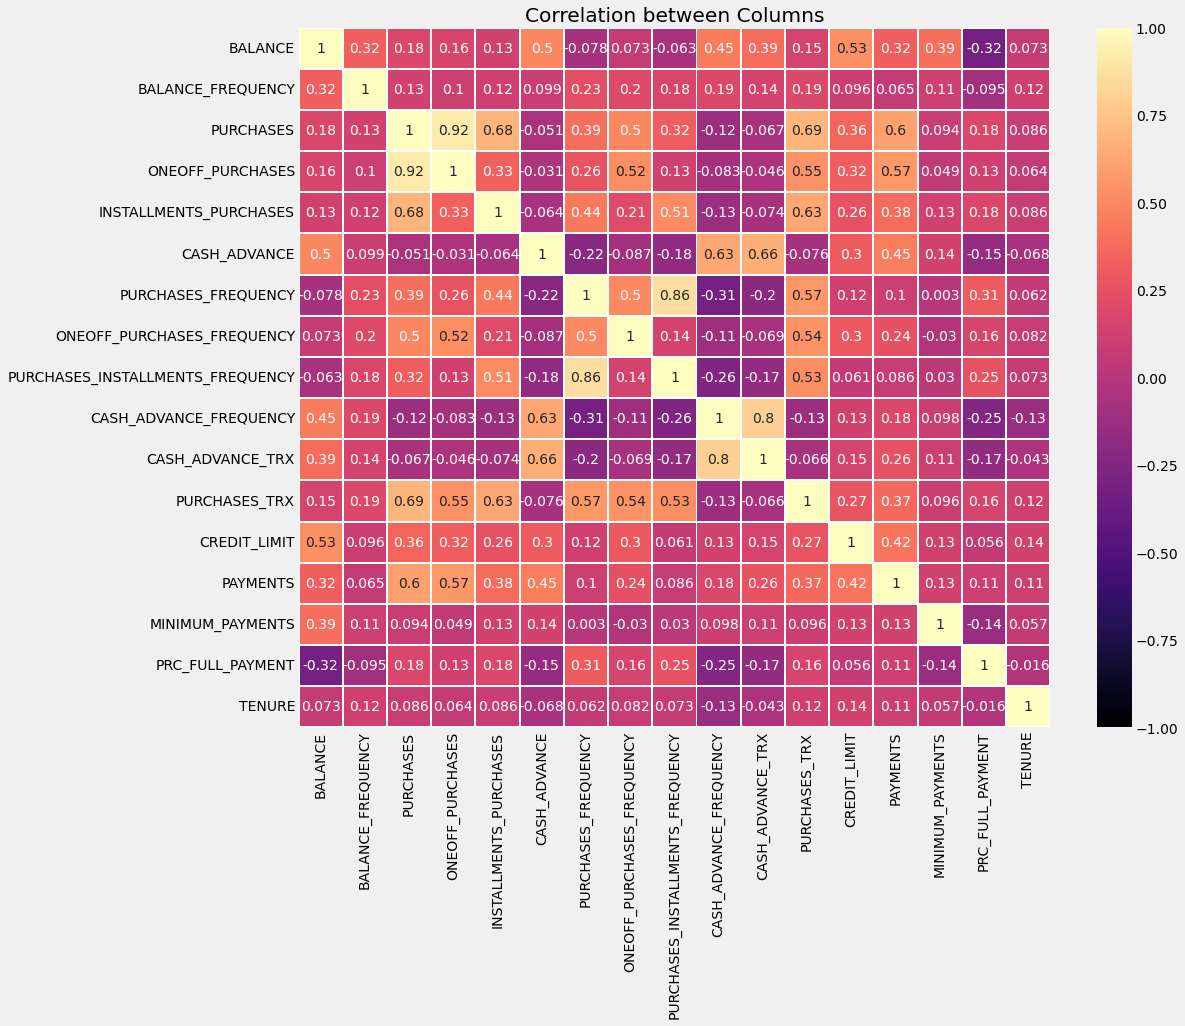

In [24]:
plt.figure(figsize=(15,12))
sns.heatmap(dtc.corr(), vmin=-1, vmax=1, cmap='magma', annot=True, linewidths=.9)
plt.title("Correlation between Columns")
plt.show()

**Visualisasi Heatmap diatas menunjukkan korelasi antar kolom pada dataset. Saat nilai korelasi positif dan > 0.5 maka jika salah satu kolom nilainya naik kolom yang berkorelasi dengannya pun ikut naik.**

## **STEP 7 : DATA PREPROCESSING**

### **PCA**

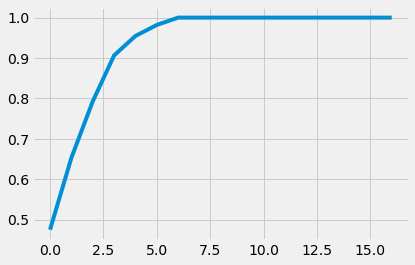

In [25]:
dtp = dtc.drop(columns=['CUST_ID'])

pca=PCA(whiten=True)
pca.fit(dtp)
cumsum = np.cumsum(pca.explained_variance_ratio_)

plt.figure()
plt.plot(cumsum)

Dari hasil plot dapat dilihat, hanya dengan 3 kolom (features) sudah mewakili kurang lebih 90% dari data asli. 

In [26]:
# mengambil 90% dari data asli
pca=PCA(n_components=0.90, whiten=True)
pca.fit(dtp)

print('Jumlah kolom untuk mendapatkan 90% dari data asli: ', pca.n_components_)
print(np.sum(pca.explained_variance_ratio_))

Jumlah kolom untuk mendapatkan 90% dari data asli:  4
0.9064713897064197


Untuk mewakili 90% dari keseluruhan data dibutuhkan 4 features/kolom/n_components.

### **Scaling**

In [27]:
scaler = StandardScaler()
dtp_std = scaler.fit_transform(dtp)

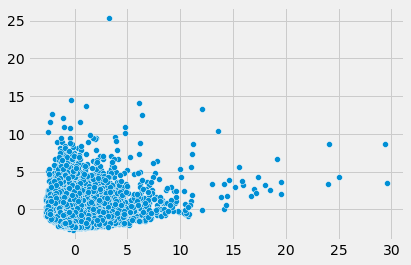

In [28]:
# transform data with PCA and plot it

dtp_2D = PCA(n_components=4).fit_transform(dtp_std)
sns.scatterplot(x=dtp_2D[:,0],y=dtp_2D[:,1])

## **STEP 8 : DEFINE MODE**

**Membuat dan mengimplementasikan menggunakan 3 model, Yaitu K-Means, Density-based spatial clustering of applications with noise (DBSCAN) dan Agglomerative Clustering**

### **K-Means**

In [29]:
# n_clusters berdasarkan PCA
kmeans = KMeans(n_clusters=4, random_state=77)
kmeans.fit(dtp_2D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=77, tol=0.0001, verbose=0)

### **DBScan**

In [30]:
dbs = DBSCAN(eps=1, min_samples=300)
dbs.fit(dtp_2D)

DBSCAN(algorithm='auto', eps=1, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=300, n_jobs=None, p=None)

### **Agglomerative Clustering**

In [31]:
agc = AC(n_clusters=4, linkage="ward").fit(dtp_2D)

## **STEP 9 : MODEL EVALUATION**

### **K-Means Evaluation**

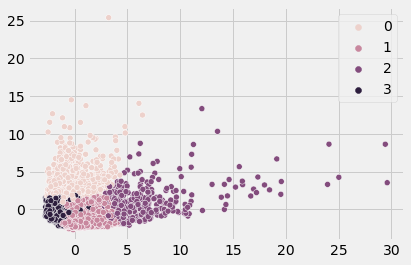

In [32]:
sns.scatterplot(x=dtp_2D[:,0],y=dtp_2D[:,1],hue=kmeans.labels_)

**Hasil Scatter plot K-Means dengan n_clusters = 4**

#### **Elbow Method**

Text(0, 0.5, 'Inertia')

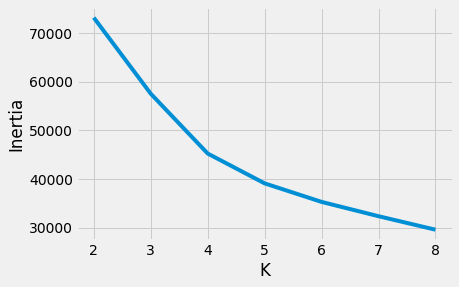

In [33]:
K =[2,3,4,5,6,7,8]
inertia = [KMeans(n_clusters=i).fit(dtp_2D).inertia_ for i in K]

plt.plot(K, inertia)
plt.xlabel('K')
plt.ylabel('Inertia')

**Untuk Elbow Method, jumlah optimal cluster (K) adalah 4 dapat dilihat terdapat lekukan atau siku pada angka. Masih sejalan dengan PCA sebelumnya.**

#### **Silhouette Method**

In [34]:
def plot_silhouette(range_n_clusters,X):
    for n_clusters in range_n_clusters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)

        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)

        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')

        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')

        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')

For n_clusters = 2 The average silhouette_score is : 0.30619237541354205
For n_clusters = 3 The average silhouette_score is : 0.34387344737917486
For n_clusters = 4 The average silhouette_score is : 0.32263585213426327
For n_clusters = 5 The average silhouette_score is : 0.3205861801338613


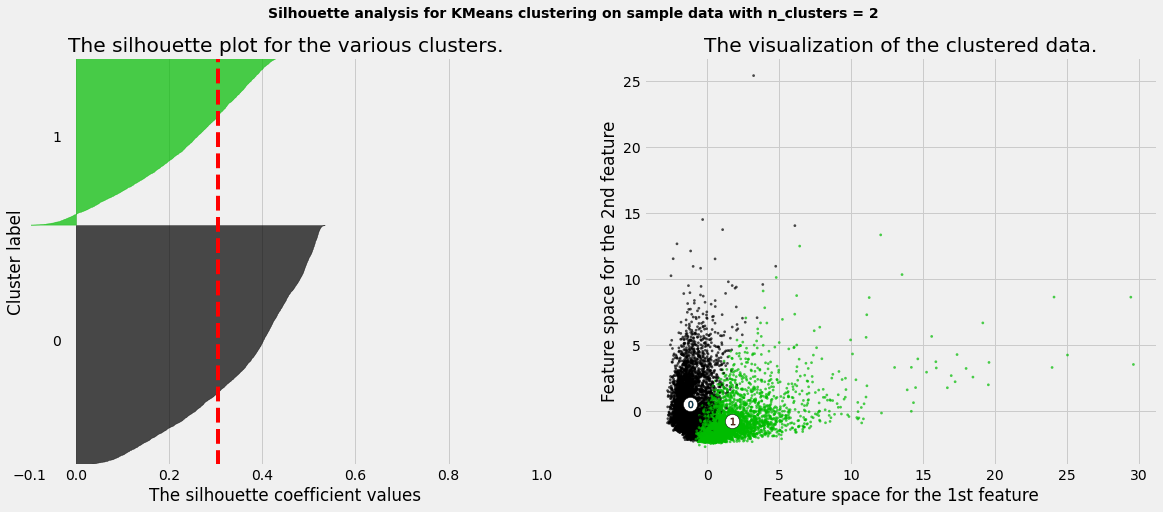

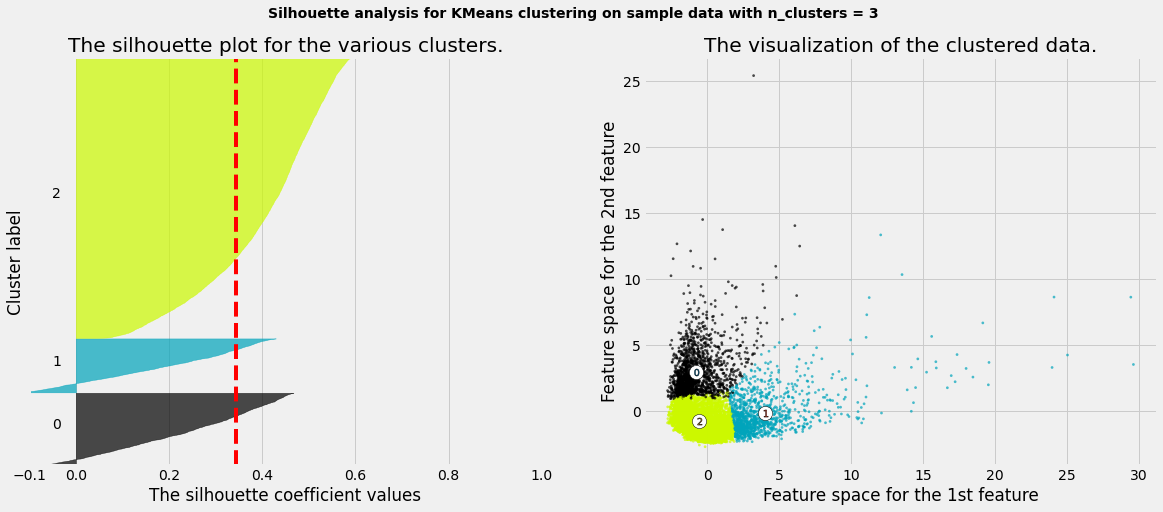

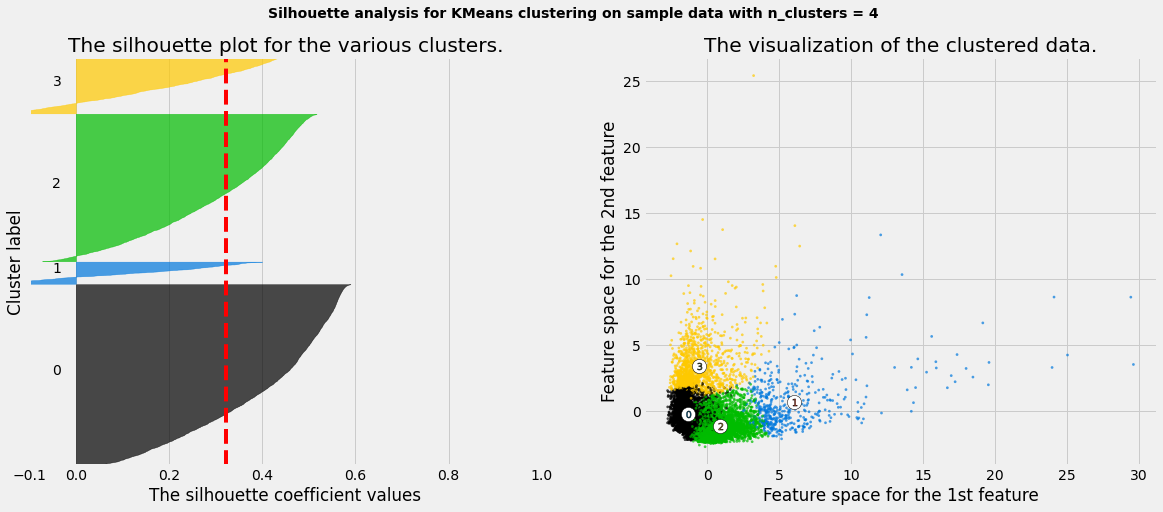

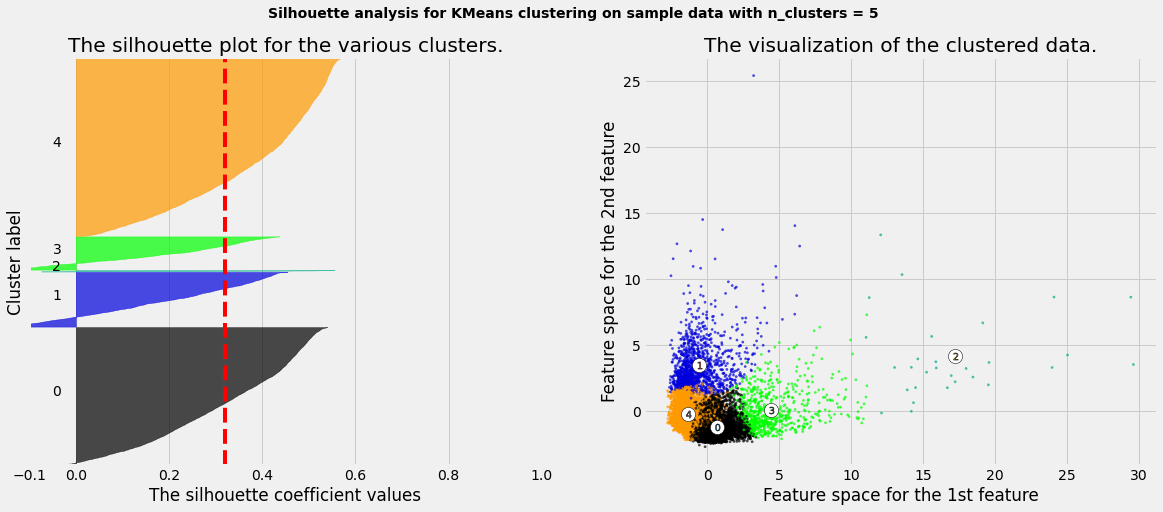

In [35]:
K =[2,3,4,5]
plot_silhouette(K, dtp_2D)

Text(0, 0.5, 'Silhouette Score')

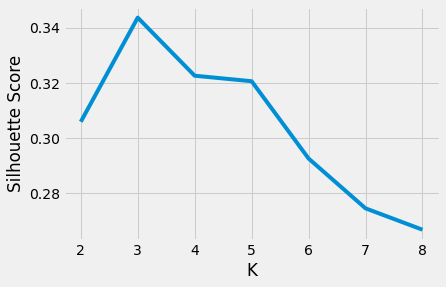

In [36]:
# plot hasil skor silhouette
K = [2,3,4,5,6,7,8]

s_score=[silhouette_score(dtp_2D, KMeans(n_clusters=i).fit(dtp_2D).labels_) for i in K]
plt.plot(K,s_score)
plt.xlabel('K')
plt.ylabel('Silhouette Score')

**Ternyata setelah di cek dengan silhouette_score, cluster yang optimal adalah 3 dengan skor 0.34.**

***Note: Silhouette score semakin mendekati angka 1 semakin baik.***

### **DBScan Evaluation**

In [37]:
def plot_dbscan(dbscan, X, size, show_xlabels=True, show_ylabels=True):
    core_mask = np.zeros_like(dbscan.labels_, dtype=bool)
    core_mask[dbscan.core_sample_indices_] = True
    anomalies_mask = dbscan.labels_ == -1
    non_core_mask = ~(core_mask | anomalies_mask)

    cores = dbscan.components_
    anomalies = X[anomalies_mask]
    non_cores = X[non_core_mask]
    
    plt.scatter(cores[:, 0], cores[:, 1],
                c=dbscan.labels_[core_mask], marker='o', s=size, cmap="Paired")
    plt.scatter(cores[:, 0], cores[:, 1], marker='*', s=20, c=dbscan.labels_[core_mask])
    plt.scatter(anomalies[:, 0], anomalies[:, 1],
                c="r", marker="x", s=100)
    plt.scatter(non_cores[:, 0], non_cores[:, 1], c=dbscan.labels_[non_core_mask], marker=".")
    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)
    plt.title("eps={:.2f}, min_samples={}".format(dbscan.eps, dbscan.min_samples), fontsize=14)

[ 0  0  0 ... -1 -1 -1]


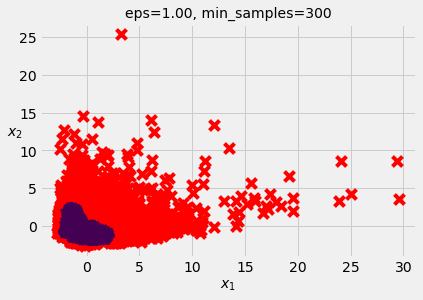

In [38]:
plot_dbscan(dbs,dtp_2D,size=10)
print(dbs.labels_)

In [39]:
# score default modelling
silhouette_score(dtp_2D, dbs.labels_)

0.28748053872897816

**Hasil plot DBSCAN menunjukkan bahwa DBSCAN membagi data menjadi 2 cluster. Dengan silhouette score 0.28.**

### **Agglomerative Clustering Evaluation**

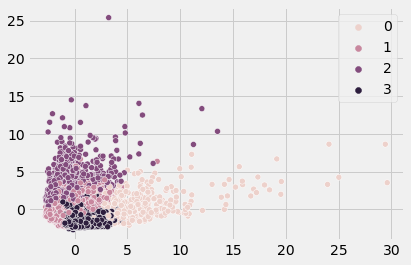

In [40]:
sns.scatterplot(x=dtp_2D[:,0],y=dtp_2D[:,1],hue=agc.labels_)

**Hasil plot Agglomerative CLustering dengan n_clusters=4 (sama dengan PCA)**

In [41]:
# score default modelling
silhouette_score(dtp_2D, agc.labels_)

0.2717018077377841

Text(0, 0.5, 'AGC Silhouette Score')

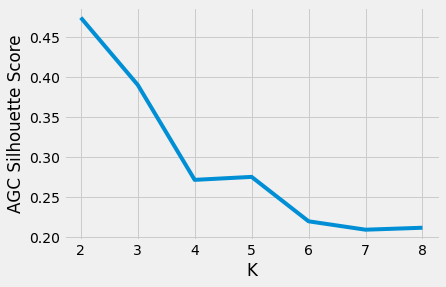

In [42]:
K = [2,3,4,5,6,7,8]

agc_score=[silhouette_score(dtp_2D, AC(n_clusters=i, linkage="ward").fit(dtp_2D).labels_) for i in K]
plt.plot(K, agc_score)
plt.xlabel('K')
plt.ylabel('AGC Silhouette Score')

**Dengan Agglomerative Clustering hasil dari PCA cluster yang dibuat sebanyak 4 cluster. Namun ternyata berdasarkan silhouette score, jumlah cluster terbaik adalah 2 dengan skor 0.50.**

0.3903919021588151


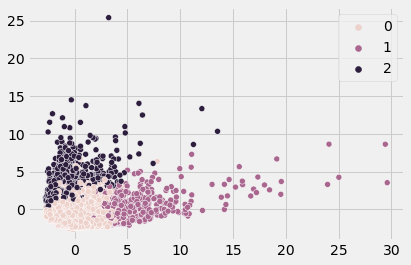

In [43]:
# new agglomerative clustering with n_clusters=2

agc_new = AC(n_clusters=3, linkage="ward").fit(dtp_2D)
sns.scatterplot(x=dtp_2D[:,0],y=dtp_2D[:,1],hue=agc_new.labels_)
print(silhouette_score(dtp_2D, agc_new.labels_))

## **STEP 10 : MODEL INFERENCE**

### **K-Means Inference**

In [44]:
kmeans.predict(dtp_2D)

array([3, 0, 1, ..., 1, 3, 3], dtype=int32)

In [45]:
# predict with standardized data
kmeans.predict(dtp_std[:,:4])

array([3, 1, 1, ..., 3, 3, 3], dtype=int32)

In [46]:
# n_clusters berdasarkan hasil silhouette score
kmeans_new = KMeans(n_clusters=3, random_state=77)
kmeans_new.fit(dtp_2D)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=77, tol=0.0001, verbose=0)

In [47]:
dtc['cluster_id'] = kmeans_new.labels_

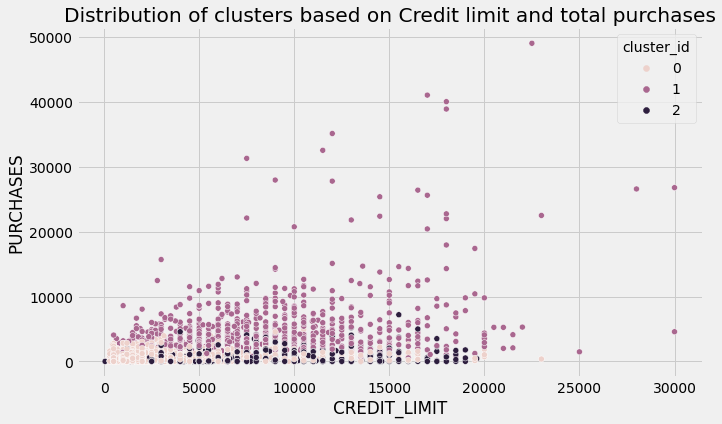

In [48]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=dtc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_id')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

### **DBScan Inference**

In [49]:
dbs.fit_predict(dtp_2D)

array([ 0,  0,  0, ..., -1, -1, -1])

In [50]:
# predict with standardized data
dbs.fit_predict(dtp_std)

array([ 0, -1, -1, ..., -1, -1, -1])

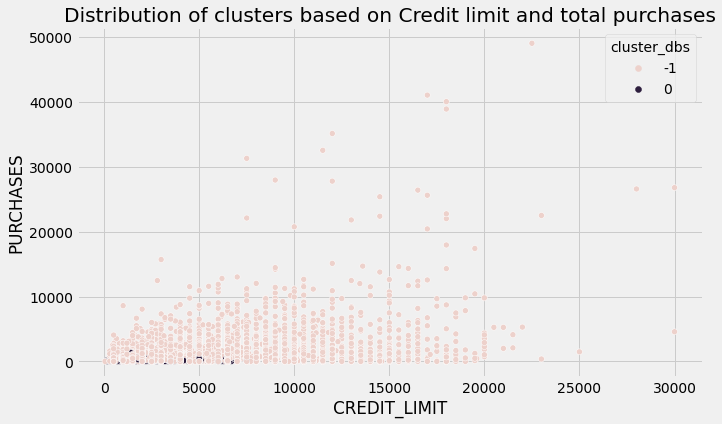

In [51]:
dtc['cluster_dbs'] = dbs.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(data=dtc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_dbs')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

### **Agglomerative Clustering Inference**

In [52]:
agc_new.fit_predict(dtp_2D)

array([0, 2, 0, ..., 0, 0, 0])

In [53]:
# predict with standardized data
agc_new.fit_predict(dtp_std)

array([1, 2, 0, ..., 1, 1, 1])

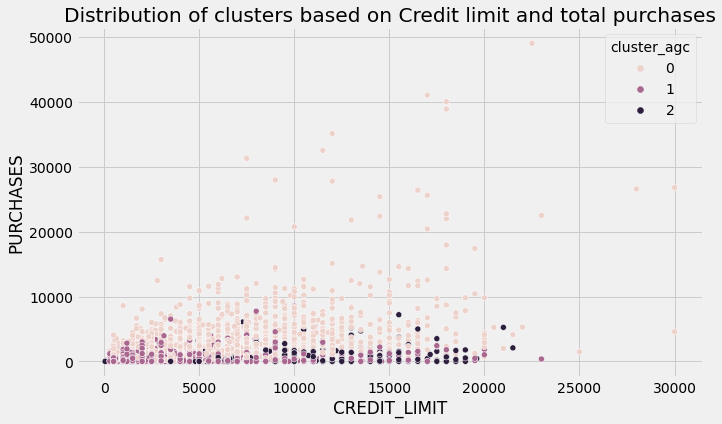

In [54]:
dtc['cluster_agc'] = agc_new.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(data=dtc, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster_agc')
plt.title('Distribution of clusters based on Credit limit and total purchases')
plt.show()

## **STEP 11 : CONCLUSION**

### **EDA Analysis :**

Dari hasil plot dataset diatas, terdapat banyak distribusi data yang skewed dan rata-rata skewed ke kanan. Visualisasi Heatmap diatas menunjukkan korelasi antar kolom pada dataset. Saat nilai korelasi positif dan > 0.5 maka jika salah satu kolom nilainya naik kolom yang berkorelasi dengannya pun ikut naik.

### **Model Analysis**

* **K-Means** = Dapat memisahkan data menjadi beberapa cluster sesuai yang kita inginkan. Disini jumlah cluster yang  digunakan berdasarkan PCA adalah 4. Namun berdasarkan perhitungan silhouette score, jumlah cluster optimum adalah 3 dengan nilai 0.34

* **DBSCAN** = Mengelompokkan data menjadi cluster-cluster sesuai dengan parameter yang diatur pengguna (epsilon dan min_samples). Hasil plot DBSCAN menunjukkan bahwa DBSCAN membagi data menjadi 2 cluster. Dengan silhouette score 0.28.

* **Agglomerative Clustering** = Model ini kurang lebih mirip dengan K-Means. hasil dari PCA cluster yang dibuat sebanyak 4 cluster. Namun ternyata berdasarkan silhouette score, jumlah cluster terbaik adalah 2 dengan skor 0.50.